In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the data
data = pd.read_csv('breast-cancer.csv')

In [5]:
#Display the first few rows of the dataframe
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Summary Statistics
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
#Check for missing values
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


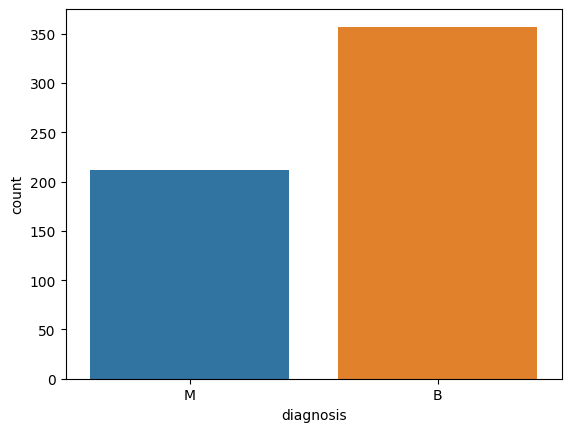

In [8]:
#Visualize the distribution of the target variable
sns.countplot(x = 'diagnosis', data = data)
plt.show()

In [ ]:
#Visualize the relationship between features and the target variable
sns.pairplot(data, hue = 'diagnosis')
plt.show()

In [9]:
#Preprocessing the data
x = data.iloc[:, 2].values
y = data.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
# Reshape the input data to ensure it is 2D
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [12]:
#Standardize the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
#Build the model
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [14]:
#Compile the model
optimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
#Train the model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 10, verbose = 1)

Epoch 1/10
46/46 [==============================] - 0s 4ms/step - loss: 0.5063 - accuracy: 0.8681 - val_loss: 0.4730 - val_accuracy: 0.8860
Epoch 2/10
46/46 [==============================] - 0s 4ms/step - loss: 0.4953 - accuracy: 0.8703 - val_loss: 0.4535 - val_accuracy: 0.8947
Epoch 3/10
46/46 [==============================] - 0s 5ms/step - loss: 0.4786 - accuracy: 0.8615 - val_loss: 0.4360 - val_accuracy: 0.8947
Epoch 4/10
46/46 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8593 - val_loss: 0.4200 - val_accuracy: 0.8947
Epoch 5/10
46/46 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.8637 - val_loss: 0.4056 - val_accuracy: 0.8947
Epoch 6/10
46/46 [==============================] - 0s 6ms/step - loss: 0.4257 - accuracy: 0.8615 - val_loss: 0.3915 - val_accuracy: 0.8947
Epoch 7/10
46/46 [==============================] - 0s 5ms/step - loss: 0.4308 - accuracy: 0.8527 - val_loss: 0.3789 - val_accuracy: 0.8947
Epoch 8/10
46/46 [==

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

# Assuming model is the trained Keras model and x_test, y_test are the test data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

4/4 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.8947
Test accuracy: 0.8947368264198303
4/4 [==============================] - 0s 4ms/step
Precision: 0.8888888888888888
Recall: 0.851063829787234
F1 Score: 0.8695652173913044


4/4 [==============================] - 0s 3ms/step


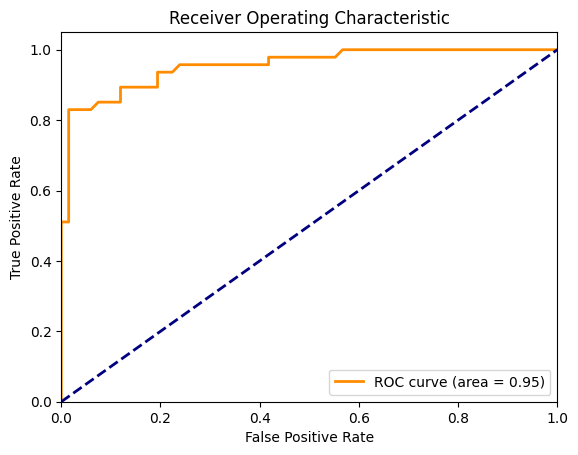

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming model is the trained Keras model and x_test, y_test are the test data
y_pred = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()